## 1. K Means Clustering

 

Recall that for a dataset $ x_1, . . . , x_N ∈ R^D $, the K-means distortion objective is: 
$$ F(\{\mu_k\}, \{r_{nk}\}) = \sum_{i=1}^N \sum_{k=1}^K r_{nk} \|\mu_k- x_n\|_2^2     \qquad  (1)   $$   

where $ µ_1, . . . , µ_K $ are centroids of the K clusters and $ r_{ik} ∈ {0, 1} $ represents whether example i belongs to cluster k. <br>
Clearly, fixing the centroids and minimizing J over the assignment give

$$ \begin{equation}
    \hat r_{ik} = \begin{cases}
        1 & k = argmin_{k'} \|\mu_{k'}-x_n\|_2^2 \\
        0 & \text{Otherwise.}
    \end{cases}
    \label{eq:opt_membership}
\end{equation} \qquad  (2)$$

On the other hand, fixing the assignment and minimizing $J$ over the centroids give
$$ \begin{equation}
    \hat \mu_k =\frac{ \sum_{i=1}^N r_{nk} x_n}{\sum_{i=1}^N r_{nk}}
    \label{eq:opt_mean}
\end{equation} \qquad  (3) $$ 

What the K-means algorithm does is simply to alternate between these two steps.

<img src = 'Algo1.png'>

Implement K-means clustering to identify main clusters in
the data, use the discovered centroid of cluster for classification.
 - Implement K-means clustering algorithm to identify clusters in a two-dimensional toy-dataset.
 - Implement image compression using K-means clustering algorithm.
 - Implement classification using the centroids identified by clustering on digits dataset.
 - Implement K-means++ clustering algorithm to identify clusters in a two-dimensional toy-dataset i.e. implement the kmeans++ function to compute the centers.

In [11]:
import numpy as np
from data_loader import toy_dataset, load_digits
from kmeans import KMeans, KMeansClassifier, get_k_means_plus_plus_center_indices as k_plus, get_lloyd_k_means as k_vanilla, transform_image
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from utils import Figure
from sklearn.metrics import mean_squared_error
from kmeansTest import kmeans_toy, kmeans_image_compression, kmeans_classification
import matplotlib
from IPython.display import Image
matplotlib.use('Agg')
import matplotlib.pyplot as plt

### Dataset for K-Means Clustering

We will use 2 datasets - 2-D Toy Dataset and Digits datasets for K means part.<br>
Toy Dataset is a two-dimensional dataset generated from 4 Gaussian distributions. We will use this
dataset to visualize the results of our algorithm in two dimensions. You can find it in data_loader.py<br>
We will use digits dataset from sklearn to test K-means based classifier and generate digits using
Gaussian Mixture model. Each data point is a 8 × 8 image of a digit. This is similar to MNIST but less
complex. There are 10 classes in digits dataset. <br>
Link for Digits dataset: sklearn.datasets.digits http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

### 1.1 Implementing k-means++ algorithm


Recall from lecture Kmeans++. Please refer to the algorithm below. In simple terms, cluster centers are initially chosen at random from the set of input observation vectors, where the probability of choosing vector x is high if x is not near any previously chosen centers. <br>

Here is a one-dimensional example. Our observations are $ [0, 1, 2, 3, 4] $. Let the first center, $ c1 $, be 0. The probability that the next cluster center, $ c2 $, is x is proportional to $ ||c1-x||^2 $. So, $ P(c2 = 1) = 1a, P(c2 = 2) = 4a, P(c2 = 3) = 9a, P(c2 = 4) = 16a $, where $ a = 1/(1+4+9+16) $.<br>
Suppose $ c2 = 4 $. Then, $ P(c3 = 1) = 1a, P(c3 = 2) = 4a, P(c3 = 3) = 1a $, where $ a = 1/(1+4+1) $. <br>
For more insights, follow this: http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf <br>
<img src = 'kmeans++.png' >

[+] K-Means on Toy Dataset
[+] K-Means Vanilla
[success] : kmeans clustering done on toy dataset
Toy dataset K means clustering converged in 6 steps

[+] K-Means Plus Plus
[+] returning center for [450, 450] points: [105, 309, 435, 207, 75, 185, 379, 283, 11]
[success] : kmeans clustering done on toy dataset
Toy dataset K means clustering converged in 3 steps



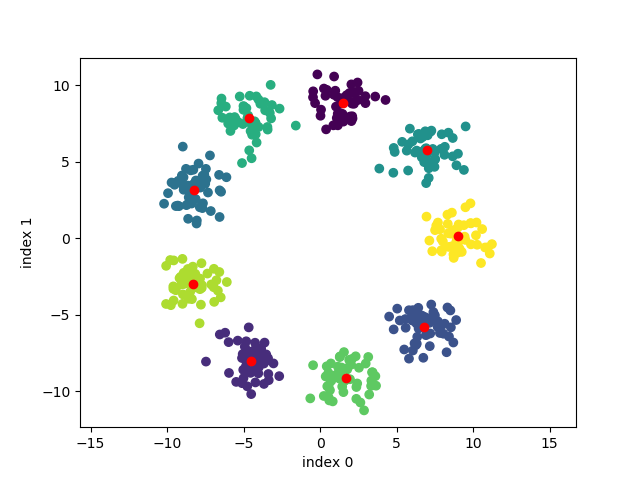

In [12]:
kmeans_toy()
Image("plots/toy_dataset_predicted_labels.png")

### 1.2 Implementing K-means clustering algorithm

 - Initialize means by picking self.n_cluster from N data points
 - Update means and membership until convergence or until you have made self.max_iter updates.
 - return (means, membership, number_of_updates)
 - If at some iteration, there exists a cluster k with no points assigned to it, then do not update the centroid of this cluster for this round.
 - While assigning a sample to a cluster, if there’s a tie (i.e. the sample is equidistant from two centroids), you should choose the one with smaller index (like what numpy.argmin does).
 - For each k, we are trying to compare based on the Euclidean distance. <br>
 
 
 ``` <br>
 Class KMeans:
        Attr:
            n_cluster - Number of cluster for kmeans clustering (Int)
            max_iter - maximum updates for kmeans clustering (Int)
            e - error tolerance (Float)
            generator - random number generator from 0 to n for choosing the first cluster at random
                The default is np.random here but in grading, to calculate deterministic results,
                We will be using our own random number generator.
            
            def __init__(self, n_cluster, max_iter=100, e=0.0001, generator=np.random):
                self.n_cluster = n_cluster
                self.max_iter = max_iter
                self.e = e
                self.generator = generator
              

            def fit(self, x, centroid_func=get_lloyd_k_means):
                Finds n_cluster in the data x
                params: 
                x - N X D numpy array
                centroid_func - To specify which algorithm we are using to compute the centers(Lloyd(regular) or Kmeans++) The default is Lloyd's Kmeans.
                
                returns: A tuple (centroids a n_cluster X D numpy array, y a length (N,) numpy array where cell i is the ith sample's assigned cluster, number_of_updates a Int)
            Note: Number of iterations is the number of time you update the assignment
 
 ```
 
 Representative images are shown in fig. 2. Red dots are cluster centroids.
Note that color coding of recovered clusters may not match that of correct clusters. This is due to mis-match
in ordering of retrieved clusters and correct clusters (which is fine). <br>


<img src = 'PA4img.png' >

### 1.3 Classification with k-means

Another application of clustering is to obtain a faster version of the nearest neighbor algorithm. Recall that nearest neighbor evaluates the distance of a test sample from every training point to predict its class, which can be very slow. Instead, we can compress the entire training dataset to just the K centroids, where each centroid is now labeled as the majority class of the corresponding cluster. After this compression the prediction time of nearest neighbor is reduced from O(N) to just O(K) (see Algorithm 2 for the pseudocode). <br>
<img src =  'Algo2.png' > 

run **KmeansTest.py** to evaluate the classifier on a test set (digits). For comparison, the script will also print accuracy of a logistic classifier and a nearest neighbor classifier. (Note: a naive K-means classifier may not do well but it can be an effective unsupervised method in a classification pipeline .) <br>

Note: 1) break ties in the same way as in previous problems; 2) if some centroid doesn’t contain any
point, set the label of this centroid as 0. <br>

The prediction accuracy baseline is 0.77 for KMeans Lloyd(regular) algorithm and 0.72 for KMeans++ algorithm. Note: these differ on different datasets and in more cases Kmeans++ works better. 

```


    Class KMeansClassifier:
        
        Attr:
            n_cluster - Number of cluster for kmeans clustering (Int)
            max_iter - maximum updates for kmeans clustering (Int)
            e - error tolerance (Float)
            generator - random number generator from 0 to n for choosing the first cluster at random
            The default is np.random here but in grading, to calculate deterministic results,
            We will be using our own random number generator.
    

        def __init__(self, n_cluster, max_iter=100, e=1e-6, generator=np.random):
            self.n_cluster = n_cluster
            self.max_iter = max_iter
            self.e = e
            self.generator = generator


        def fit(self, x, y, centroid_func=get_lloyd_k_means):
        
            Train the classifier
            params:
                x - N X D size  numpy array
                y - (N,) size numpy array of labels
                centroid_func - To specify which algorithm we are using to compute the centers(Lloyd(regular) or Kmeans++) The default is Lloyd's Kmeans.
            returns:
                None
            Stores following attributes:
                self.centroids : centroids obtained by kmeans clustering (n_cluster X D numpy array)
                self.centroid_labels : labels of each centroid obtained by 
                    majority voting (N,) numpy array) 
                    
    
         def predict(self, x):
        
            Predict function
            params:
                x - N X D size  numpy array
            returns:
                predicted labels - numpy array of size (N,)
        
       
        
```


[+] K-Means Classification
[+] K-Means Vanilla
[*] Prediction accuracy of K-means classifier with 10 cluster is 0.7822222222222223

[+] K-Means Plus Plus
[+] returning center for [1347, 1347] points: [1126, 723, 204, 1142, 779, 387, 1280, 464, 451, 1219]
[*] Prediction accuracy of K-means classifier with 10 cluster is 0.6755555555555556
[*] Accuracy of logistic regression classifier is 0.9622222222222222
[*] Accuracy of Nearest Neighbour classifier is 0.9933333333333333


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


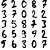

In [13]:
kmeans_classification()
Image("plots/digits.png")

### 1.4 Image compression with K-means 
In this part, we will look at lossy image compression as an application of clustering. The idea is simply to treat each pixel of an image as a point $x_i$, then perform K-means algorithm to cluster these points, and finally replace each pixel with its centroid. <br>

You can see that this image is distorted as compared to the original baboon.tiff. <br>
<img src="baboon.jpg">
The ideal result should take about 35-40 iterations and the Mean Square Error should be less than 0.0098. It takes about 1-2 minutes to complete normally.


```
def transform_image(image, code_vectors):

        Quantize image using the code_vectors

        Return new image from the image by replacing each RGB value in image with nearest code vectors (nearest in euclidean distance sense)

        returns:
            numpy array of shape image.shape
```

[+] K-Means Image Compression
[+] RGB centroids computed in 44 iteration
[+] Mean square error per pixel is 0.009781646808580124



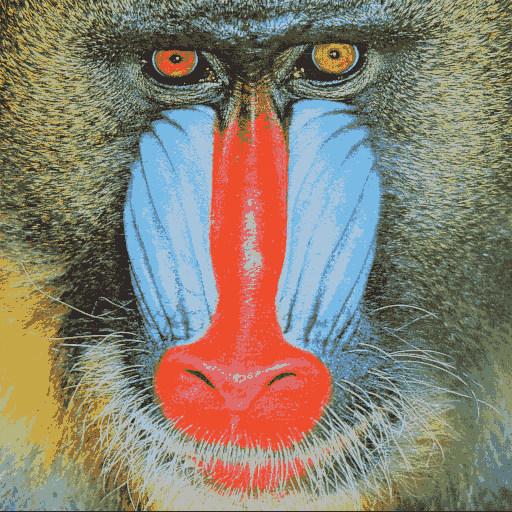

In [10]:
kmeans_image_compression()
Image("baboon.jpg")
Image("plots/compressed_baboon.png")